In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"
drug_df = pd.read_csv(mouse_drug_data)
trial_df = pd.read_csv(clinical_trial_data)
drugtrial_df = pd.merge(drug_df, trial_df, on="Mouse ID")
drugtrial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
drugtrial_df["Drug"].value_counts()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug, dtype: int64

In [3]:
# Tumor Response to Treatment
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
Avg_Tumor_Volume = drugtrial_df.groupby(["Drug", "Timepoint"]).agg(['mean', 'sem'])
Avg_Tumor_Volume = Avg_Tumor_Volume.reset_index()
Avg_Tumor_Volume = Avg_Tumor_Volume.drop("Metastatic Sites", axis=1)
sem = Avg_Tumor_Volume['Tumor Volume (mm3)']['sem']



In [4]:
# Minor Data Munging to Re-Format the Data Frames
Table = Avg_Tumor_Volume.pivot_table(index="Timepoint",
                                     values="Tumor Volume (mm3)",
                                     columns="Drug")
Table.head(25)


mean                                                         \
Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo   
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

                                                            sem            \
Drug        Propriva   Ramicane   Stelasyn  Zoniferol Capomulin  Ceftamin   
Timepoint                                                                   
0          45.000000  45.000000  45.000000  45.000000  0.000000  0.000000   
5          47.248967  43.944859  47.527452  46.851818  0.448593  0.164505   
10         49.101541  42.531957  49.463844  48.689881  0.702684  0.236144   
15         51.067318  41.495061  51.529409  50.779059  0.838617  0.332053   
20         53.346737  40.238325  54.067395  53.170334  0.909731  0.359482   
25         55.504138  38.974300  56.166123  55.432935  0.881642  0.439356   
30         58.196374  38.703137  59.826738  57.713531  0.934460  0.490620   
35         60.350199  37.451996  62.440699  60.089372  1.052241  0.692248   
40         63.045537  36.574081  65.356386  62.916692  1.223608  0.708505   
45         66.258529  34.955595  68.438310  65.960888  1.223977  0.902358   

                                                                       \
Drug      Infubinol  Ketapril  Naftisol   Placebo  Propriva  Ramicane   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.235102  0.264819  0.202385  0.218091  0.231708  0.482955   
10         0.282346  0.357421  0.319415  0.402064  0.376195  0.720225   
15         0.357705  0.580268  0.444378  0.614461  0.466109  0.770432   
20         0.476210  0.726484  0.595260  0.839609  0.555181  0.786199   
25         0.550315  0.755413  0.813706  1.034872  0.577401  0.746991   
30         0.631061  0.934121  0.975496  1.218231  0.746045  0.864906   
35         0.984155  1.127867  1.013769  1.287481  1.084929  0.967433   
40         1.055220  1.158449  1.118567  1.370634  1.564779  1.128445   
45         1.144427  1.453186  1.416363  1.351726  1.888586  1.226805   

                               
Drug       Stelasyn Zoniferol  
Timepoint                      
0          0.000000  0.000000  
5          0.239862  0.188950  
10         0.433678  0.263949  
15         0.493261  0.370544  
20         0.621889  0.533182  
25         0.741922  0.602513  
30         0.899548  0.800043  
35         1.003186  0.881426  
40         1.410435  0.998515  
45         1.576556  1.003576

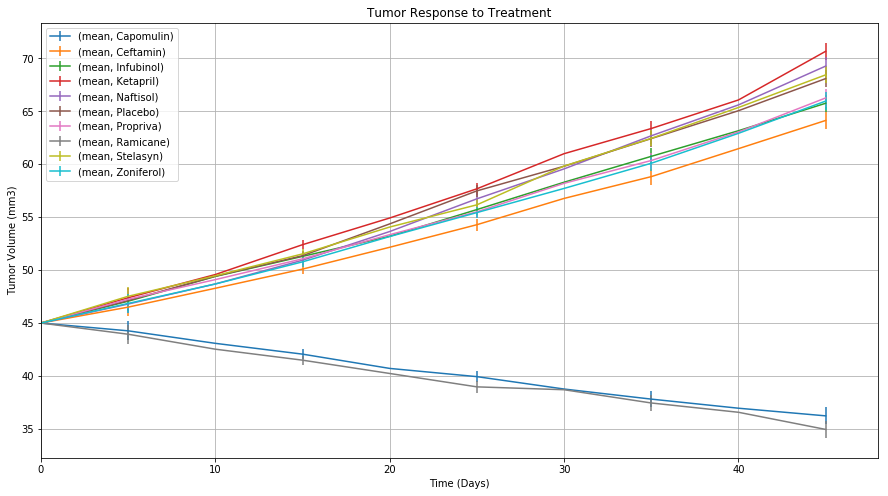

In [5]:
styles = ["o", ".", "2", "v", "1", "8", "s", "*", "+","3"]
fig, ax = plt.subplots()
for col, style in zip(Table.columns, styles):
    Table[col].plot(kind="line", linestyle="-", style=style, ax=ax,
                    figsize=(15, 8), xlim=(0, 48), grid=True, yerr=sem)
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
ax.set_figsize = (15, 8)
plt.savefig('Tumor_Responses.png')

In [6]:
# Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
Metastatic_Sites = drugtrial_df.groupby(["Drug", "Timepoint"]).agg(['mean', 'sem'])
Metastatic_Sites = Metastatic_Sites.drop("Tumor Volume (mm3)", axis=1)
Metastatic_Sites = Metastatic_Sites.reset_index()
sem = Metastatic_Sites['Metastatic Sites']['sem']
Metastatic_Sites.head()

Drug Timepoint Metastatic Sites          
                                   mean       sem
0  Capomulin         0         0.000000  0.000000
1  Capomulin         5         0.160000  0.074833
2  Capomulin        10         0.320000  0.125433
3  Capomulin        15         0.375000  0.132048
4  Capomulin        20         0.652174  0.161621

In [17]:
Table = Metastatic_Sites.pivot_table(index="Timepoint",
                                     values="Metastatic Sites",
                                     columns="Drug")
Table.head(15)

mean                                                    \
Drug      Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10         0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15         0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20         0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25         0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30         1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35         1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40         1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45         1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                        sem            \
Drug       Propriva  Ramicane  Stelasyn Zoniferol Capomulin  Ceftamin   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.320000  0.120000  0.240000  0.166667  0.074833  0.108588   
10         0.565217  0.250000  0.478261  0.500000  0.125433  0.152177   
15         0.764706  0.333333  0.782609  0.809524  0.132048  0.180625   
20         1.000000  0.347826  0.952381  1.294118  0.161621  0.241034   
25         1.357143  0.652174  1.157895  1.687500  0.181818  0.258831   
30         1.615385  0.782609  1.388889  1.933333  0.172944  0.249479   
35         2.300000  0.952381  1.562500  2.285714  0.169496  0.266526   
40         2.777778  1.100000  1.583333  2.785714  0.175610  0.289128   
45         2.571429  1.250000  1.727273  3.071429  0.202591  0.286101   

                                                                       \
Drug      Infubinol  Ketapril  Naftisol   Placebo  Propriva  Ramicane   
Timepoint                                                               
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5          0.091652  0.098100  0.093618  0.100947  0.095219  0.066332   
10         0.159364  0.142018  0.163577  0.115261  0.105690  0.090289   
15         0.194015  0.191381  0.158651  0.190221  0.136377  0.115261   
20         0.234801  0.236680  0.181731  0.234064  0.171499  0.119430   
25         0.265753  0.288275  0.185240  0.263888  0.199095  0.119430   
30         0.227823  0.347467  0.266667  0.300264  0.266469  0.139968   
35         0.224733  0.361418  0.330464  0.341412  0.366667  0.145997   
40         0.314466  0.315725  0.321702  0.297294  0.433903  0.160591   
45         0.309320  0.278722  0.351104  0.304240  0.428571  0.190221   

                               
Drug       Stelasyn Zoniferol  
Timepoint                      
0          0.000000  0.000000  
5          0.087178  0.077709  
10         0.123672  0.109109  
15         0.153439  0.111677  
20         0.200905  0.166378  
25         0.219824  0.236621  
30         0.230641  0.248168  
35         0.240983  0.285714  
40         0.312815  0.299791  
45         0.359062  0.286400

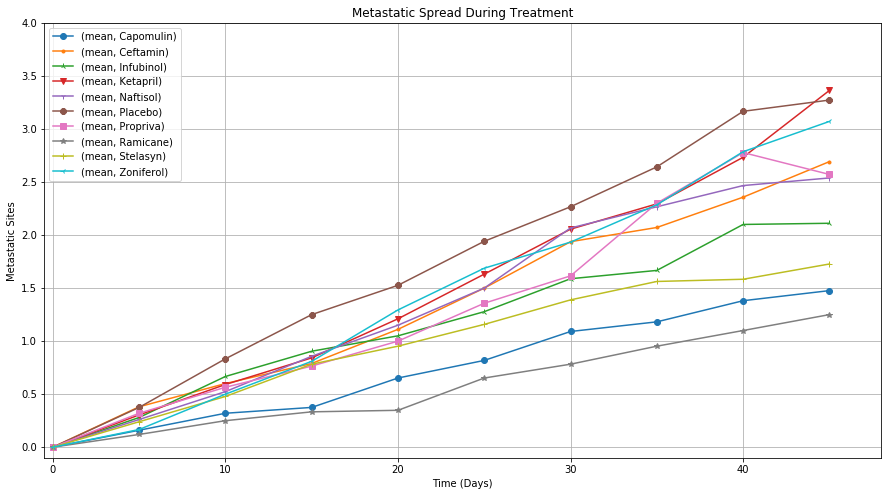

In [8]:
fig, ax = plt.subplots()
for col, style in zip(Table.columns, styles):
    
    
    Table[col].plot(linestyle="-", style=style, ax=ax,
                    figsize=(15, 8), xlim=(-0.5, 48),
                    grid=True, ylim=(-0.1, 4))

ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.set_figsize = (15, 8)
plt.savefig('Metastatic_Sites.png')

In [9]:
# Survival Rates
Mouse_Count = drugtrial_df.groupby(["Drug", "Timepoint"]).count()
Mouse_Count = Mouse_Count.drop(["Metastatic Sites",
                                "Tumor Volume (mm3)"], axis=1)
Mouse_Count = Mouse_Count.reset_index()
Mouse_Count


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [10]:
Mouse_pct = Mouse_Count.groupby(['Drug', 'Timepoint']).sum()
Mouse_pct = round(Mouse_pct.div(Mouse_pct.groupby('Drug').first()) * 100, 2)
Mouse_pct = Mouse_pct.rename(columns={'Mouse ID': 'Percent Alive'})

Mouse_pct.head()

Percent Alive
Drug      Timepoint               
Capomulin 0                  100.0
          5                  100.0
          10                 100.0
          15                  96.0
          20                  92.0

In [11]:
Metastatic_Sites = drugtrial_df.groupby(["Drug", "Timepoint"]).agg(['mean', 'sem'])
Metastatic_Sites = Metastatic_Sites.drop("Tumor Volume (mm3)", axis=1)
Metastatic_Sites = Metastatic_Sites.reset_index()
sem = Metastatic_Sites['Metastatic Sites']['sem']
Metastatic_Sites.head()

Drug Timepoint Metastatic Sites          
                                   mean       sem
0  Capomulin         0         0.000000  0.000000
1  Capomulin         5         0.160000  0.074833
2  Capomulin        10         0.320000  0.125433
3  Capomulin        15         0.375000  0.132048
4  Capomulin        20         0.652174  0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
Table = Mouse_pct.pivot_table(index="Timepoint",
                              values='Percent Alive', columns="Drug")
Table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0


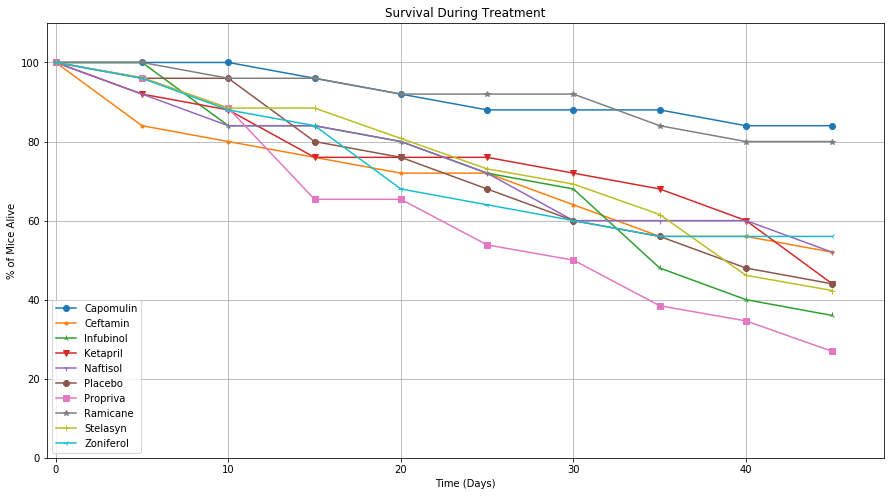

In [13]:
# In[17]:
fig, ax = plt.subplots()
for col, style in zip(Table.columns, styles):
    Table[col].plot(linestyle="-", style=style, ax=ax,
                    figsize=(15, 8), xlim=(-0.5, 48), grid=True, ylim=(0, 110))
ax.legend(loc="Best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("% of Mice Alive")
ax.set_title("Survival During Treatment")
ax.set_figsize = (15, 8)
plt.savefig('Survival Rate.png')

In [14]:
# Calculate the percent changes for each drug
Tumor_Change = Avg_Tumor_Volume.pivot_table(index="Timepoint",
                                            values='Tumor Volume (mm3)',
                                            columns="Drug")
Tumor_Change = round(Tumor_Change.pct_change()*100, 4)
Tumor_Change = Tumor_Change.fillna(0)
Tumor_Change = Tumor_Change.tail(1)
Tumor_Change = Tumor_Change.stack()
Tumor_Change = Tumor_Change.reset_index(level=0, drop=True)
Tumor_Change.head(15)

,mean,sem
Drug,,
Capomulin,-1.9533,0.0302
Ceftamin,4.3348,27.3608
Infubinol,4.1048,8.4539
Ketapril,6.9540,25.4424
Naftisol,5.5864,26.6230
Placebo,4.6599,-1.3795
Propriva,5.0963,20.6934
Ramicane,-4.4252,8.7164
Stelasyn,4.7156,11.7780


In [15]:
Pct_Changed = sorted(tuple(zip(Tumor_Change['mean'], Tumor_Change.index)))
Efficacy, Drug = zip(*Pct_Changed)

colors = []
for value in Efficacy:
    if value > 0:
        colors.append('r')
    else:
        colors.append('g')

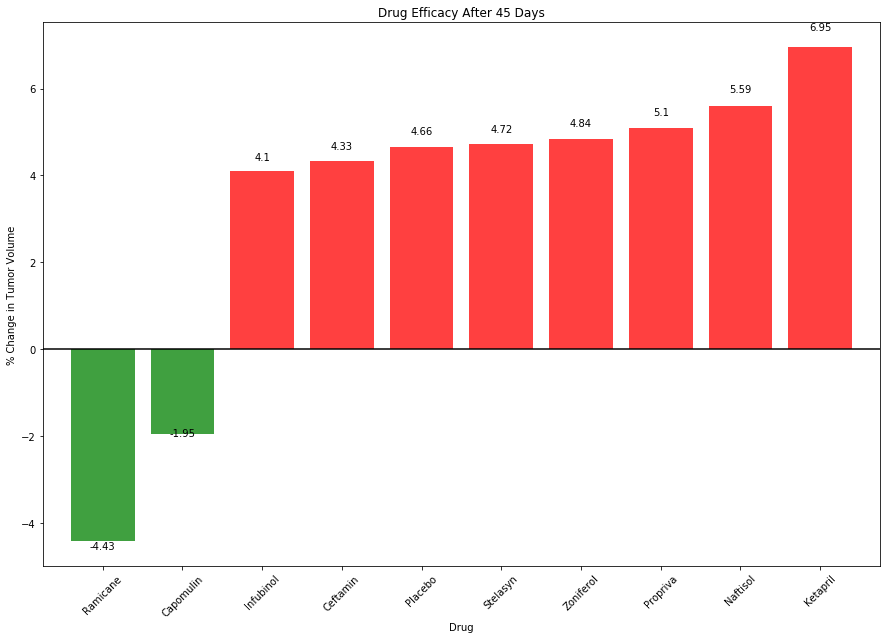

In [16]:
# In[62]:
tick_locations = []
x_axis = np.arange(0, len(Drug))
for x in x_axis:
    tick_locations.append(x)
fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(Drug, Efficacy, color=colors, alpha=0.75, align="center")
plt.title("Drug Efficacy After 45 Days")
plt.xlabel("Drug")
plt.ylabel("% Change in Tumor Volume")
plt.xlim(-0.75, len(Drug)-.25)
plt.hlines(0, -0.75, len(Drug))
plt.xticks(tick_locations, Drug, rotation=45)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                round(height, 2),
                ha='center', va='bottom')

autolabel(rects1)

plt.savefig('Drug_Efficacy.png')
fig.show()
